### DSCI 100 Final Report 
#### Group 19
- Ann Peng
- Aretas Katabaro
- Edrick Philbertio
- Jessie Zhao

# Predicting STEM Company Based On Worker's Expectation

## Introduction

Data science and STEM careers are growing in popularity as more businesses leverage technological advances to solve challenges and streamline operations. Among them, students who are waiting for employment or employees who want to change careers are very curious about what can be the mean factors that impact the trajectory of salaries and bonuses among the top 5 companies counts from our data. The purpose of the experiment was to determine which combination of predictors out of seven predictors "years at work," "gender," "total yearly compensation," "race," "education,", and "year" most accurately predicted a person's career in STEM and data science in order to provide application suggestions for job seekers with different work experience and salary expectations. This is to suggest that the job seekers can be more insightful and intentional with their development and career path. The dataset we will be working with is the "Data Science and STEM Salary" dataset from Kaggle, which contains information on numerous job titles and other criteria, and has 62,000 salary records from the leading organizations for this project. 

### Method & Result

Year, work experience, gender, total yearly compensation, race, and education are the quantitative variables that we have used to predict the categorical variable company. Firstly we have split the tidy data into training and testing sets. The training set is used to create recipes and fit models, while the test set is used to predict outcomes and determine the accuracy and workflow analysis. Then we made a forward selection to decide which combinations of the seven predictors yield the highest accuracy to predict the company recommendation to work on. Lastly, we visualized the prediction results and accuracy vs k for each predictor combination to compare prediction performance and accuracy better.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

The data we used for this project is about **Data Science and STEM Salaries**[1] taken from **Kaggle**, with the link https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries
- First, we download the data `Levels_Fyi_Salary_Data.csv` from the link above. We can see the columns available for wrangling, the detail, and a brief explanation for each column. These explanations are necessary for dropping trivial columns for our analysis.
- Next, we upload our data to the Jupyter Notebook in the 'data' folder.
- After that, we opened the `Levels_Fyi_Salary_Data.csv` to check that the data inside is in a comma-separated file format, with no header or additional information that might hinder the reading process.
- Finally, we read the data using `read_csv` and assign it to a variable named `salary_data` as follows.

In [2]:
salary_data <- read_csv("data/Levels_Fyi_Salary_Data.csv")
salary_data

Rows: 62642 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (10): timestamp, company, level, title, location, tag, gender, otherdeta...
dbl (19): totalyearlycompensation, yearsofexperience, yearsatcompany, basesa...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,⋯,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NA,107000,⋯,0,0,0,0,0,0,0,0,NA,NA
6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NA,0,⋯,0,0,0,0,0,0,0,0,NA,NA
6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NA,155000,⋯,0,0,0,0,0,0,0,0,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14,12,Full Stack,157000,⋯,0,0,0,0,0,0,0,0,NA,NA
9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8,4,iOS,194688,⋯,0,0,0,0,0,0,0,0,NA,NA
1/29/2019 5:12:59,apple,ict3,Software Engineer,200000,"Sunnyvale, CA",0,0,ML / AI,155000,⋯,0,0,0,0,0,0,0,0,NA,NA


The dataset above contains columns as follows:
- `timestamp`, the time when the data is recorded
- `company`, the company where each worker is at
- `level`, the level the obsevation is at
- `title`, the role title of the worker
- `totalyearlycompensation`, the total paycheck the worker receive for a year
- `location`, the location of the company
- `yearsofexperience`, the total working years experience a worker have
- `yearsatcompany`, the total years a worker have been working in said company
- `tag`, the job tag (subtitle) of the worker
- `basesalary`, the base salary of the worker
- `stockgrantvalue`, the stock a worker receive as compensation
- `bonus`, the bonus a worker receive
- `gender`, the gender of the worker
- `otherdetails`, other details of the worker
- `dmaid`, identification number of designated market area of the worker
- `rowNumber`, row number of the data
- `Masters_Degree`, `Bachelors_Degree`, `Doctorate_Degree`, `Highschool`, `Some_College`, and `Education` is the last education of the worker
- `Race_Asian`, `Race_White`, `Race_Hispanic`, `Race_Black`, `Race_Two_Or_More`, and `Race` is the race of the worker

Now, we will peek each unique values of each column, one by one

In [3]:
peek_tag <- unique(salary_data$tag)
#peek_tag
peek_title <- unique(salary_data$title)
#peek_title
peek_education <- unique(salary_data$Education)
#peek_education
peek_gender <- unique(salary_data$gender)
#peek_gender
peek_dmaid <- unique(salary_data$dmaid)
#peek_dmaid
peek_otherdetails <- unique(salary_data$otherdetails)
#peek_otherdetails
peek_rowNumber <- unique(salary_data$rowNumber)
#peek_rowNumber

Here, we see that the data is not yet in a tidy format:
- There are useless columns, such as `dmaid` and `rowNumber` which are hard to be interpreted
- There are hard-to-use columns, such as `location`, `level`, and `otherdetails` which are full of syntax problems, even though might be important in answering our predictive question
- There are a lot of duplicated details in each observation. For example, `Education` and `Race` alone are sufficient in telling the information of race and education of the workers
- There are a lot of missing values which can affect our classification process in the next stage

Hence, here are several things we do to tidy the data:
- First, we select useful columns that we want to use: `company` for what we want to predict, and the predictors: `yearsofexperience`, `totalyearlycompensation`, `gender`, `roletitle`, `year`, `Race`, and `Education`
- `year` is extracted and wrangled from the timestamp column with the function below.
- Then, we give filter missing values `NA` of each predictor

This binarification step can be done after visualization, before classification
- After that, we convert the `gender` column into binary, 1 for male and 0 for female. Keep in mind that we acknowledge different genders, and the binarification of gender in this project is for the purpose of simplification. 

In [4]:
# function for extracting year from timestamp
timestamp_year_extractor <- function(timeString) {
  date <- as.Date(timeString, format = "%m/%d/%Y")
  year <- format(date, "%Y")
  return(as.numeric(year))
}

tidy_salary_data <- salary_data |> 
mutate(year = timestamp_year_extractor(timestamp)) |> # making a new column
select(company, yearsofexperience, totalyearlycompensation, gender, title, year, Race, Education) |> # selecting useful columns
filter(!is.na(yearsofexperience), !is.na(gender) & !is.na(Race) & !is.na(Education)) |> # filtering the missing data
filter(gender == "Male" | gender == "Female") # binarification of gender

# tidy_salary_data$gender[tidy_salary_data$gender == "Male"] <- "1"
# tidy_salary_data$gender[tidy_salary_data$gender == "Female"] <- "0"
# tidy_salary_data$gender <- as.numeric(tidy_salary_data$gender) 
tidy_salary_data

company,yearsofexperience,totalyearlycompensation,gender,title,year,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
Google,5,400000,Male,Software Engineer,2020,Asian,PhD
Microsoft,3,136000,Male,Software Engineer,2020,Two Or More,Bachelor's Degree
Google,6,337000,Male,Software Engineer,2020,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Zapier,16,1605000,Female,Software Engineering Manager,2021,White,Master's Degree
Facebook,22,2372000,Male,Software Engineering Manager,2021,Black,Master's Degree
Facebook,17,4980000,Male,Product Manager,2021,Asian,Master's Degree


Unfortunately, the `year` column here is no longer relevant since there are only 2 years of sample, 2020 and 2021. We are going to filter it out.

In [5]:
tidy_salary_data <- tidy_salary_data |> select(-year)

Now, as we can see, some company we want to do classification on might not be available or unheard of. Moreover, classification of various company might lead to overfitting of the plot. Hence, we are going to filter out the 5 most popular company to simplify our classification.

In [6]:
# collecting the top 5 companies
top_5_company_count <- tidy_salary_data |> 
group_by(company) |> 
summarize(count=n()) |> 
arrange(desc(count)) |> 
head(5)
top_5_company_count

company,count
<chr>,<int>
Amazon,2576
Microsoft,1612
Google,1306
Facebook,999
Apple,599


In [7]:
# filtering the data into the 5 big company class
tidy_salary_data <- tidy_salary_data |> 
filter(company == "Amazon" |company == "Microsoft"|company == "Google"|company == "Facebook"|company == "Apple")
tidy_salary_data

company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Google,5,400000,Male,Software Engineer,Asian,PhD
Microsoft,3,136000,Male,Software Engineer,Two Or More,Bachelor's Degree
Google,6,337000,Male,Software Engineer,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Google,20,4500000,Male,Product Manager,Asian,Master's Degree
Facebook,22,2372000,Male,Software Engineering Manager,Black,Master's Degree
Facebook,17,4980000,Male,Product Manager,Asian,Master's Degree


Now, the obtained tidy_salary_data is divided into training data and testing data with ratio 75% to 25%, respectively for training and testing the class we will predict: company.  

In [8]:
set.seed(2023)
data_split <- initial_split(tidy_salary_data, prop = 0.75, strata = company)  
data_train <- training(data_split)   
data_test <- testing(data_split)
data_train
data_test

company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Amazon,15,310000,Male,Software Engineer,Asian,Bachelor's Degree
Amazon,19,620000,Male,Software Engineering Manager,Asian,Bachelor's Degree
Amazon,4,210000,Male,Software Engineer,Hispanic,Highschool
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,17,337000,Male,Software Engineer,Asian,Master's Degree
Microsoft,1,177000,Male,Software Engineer,White,Bachelor's Degree
Microsoft,10,87000,Male,Software Engineer,White,Master's Degree


company,yearsofexperience,totalyearlycompensation,gender,title,Race,Education
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Google,6,337000,Male,Software Engineer,Asian,Bachelor's Degree
Microsoft,4,222000,Male,Software Engineer,Asian,Master's Degree
Apple,1,180000,Male,Software Engineer,Asian,Bachelor's Degree
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Microsoft,13,187000,Female,Technical Program Manager,Asian,Bachelor's Degree
Microsoft,15,192000,Male,Software Engineer,White,Bachelor's Degree
Facebook,2,233000,Male,Data Scientist,Asian,Bachelor's Degree


After getting the training data, we counted the average total yearly compensation of each company, and sorted it in descending order.  
As for gender, we analyzed the changing trend of total yearly compensation of employees of different genders when their work experience changes.  
And the distribution of education is represented by a bar graph.

In [9]:
mean_table <- aggregate(data_train$totalyearlycompensation, by = list(type = data_train$company),mean)
names(mean_table) <- c("company","mean_totalyearlycompensation")
arrange(mean_table,desc(mean_totalyearlycompensation))

company,mean_totalyearlycompensation
<chr>,<dbl>
Facebook,340220.6
Google,276268.2
Apple,271771.6
Amazon,217642.2
Microsoft,195288.5


Here is the visualization of each of the predictors.

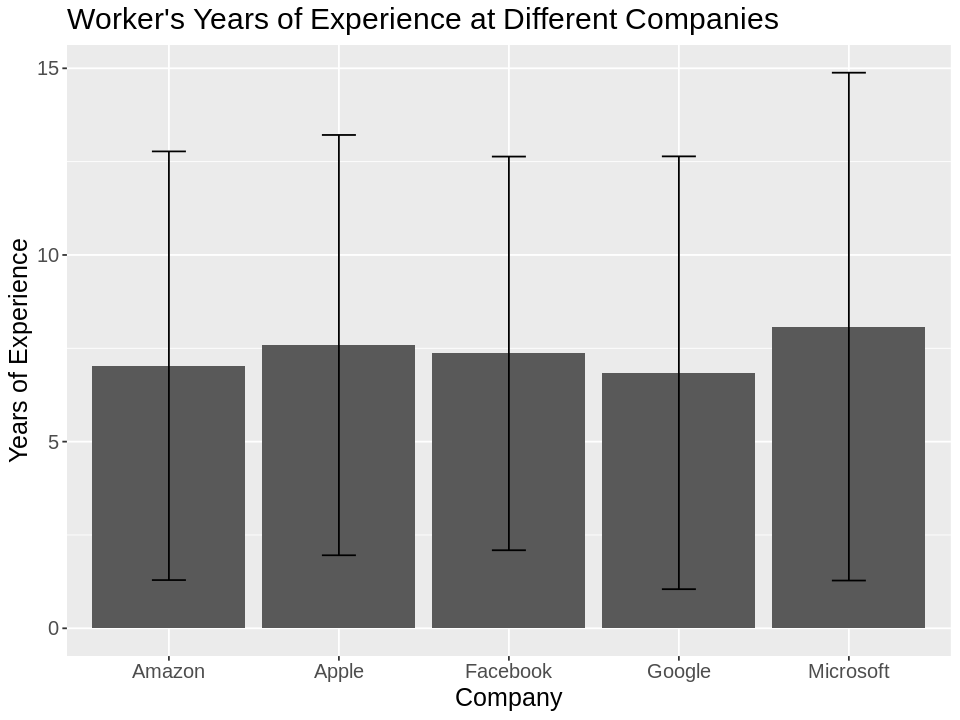

In [10]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_bar <- data_train |> group_by(company) |>
                summarize(mean_yoe=mean(yearsofexperience), sd_yoe=sd(yearsofexperience))
#data_for_vis_bar
yoe_vis_bar <-  data_for_vis_bar |>
                ggplot(aes(x=company, y=mean_yoe)) +
                geom_bar(stat="identity") +
                geom_errorbar(aes(x=company, ymin=mean_yoe-sd_yoe,ymax=mean_yoe+sd_yoe, width=.2)) +
                labs(title="Worker's Years of Experience at Different Companies", x="Company", y="Years of Experience") +
                theme(text = element_text(size=15)) 
yoe_vis_bar

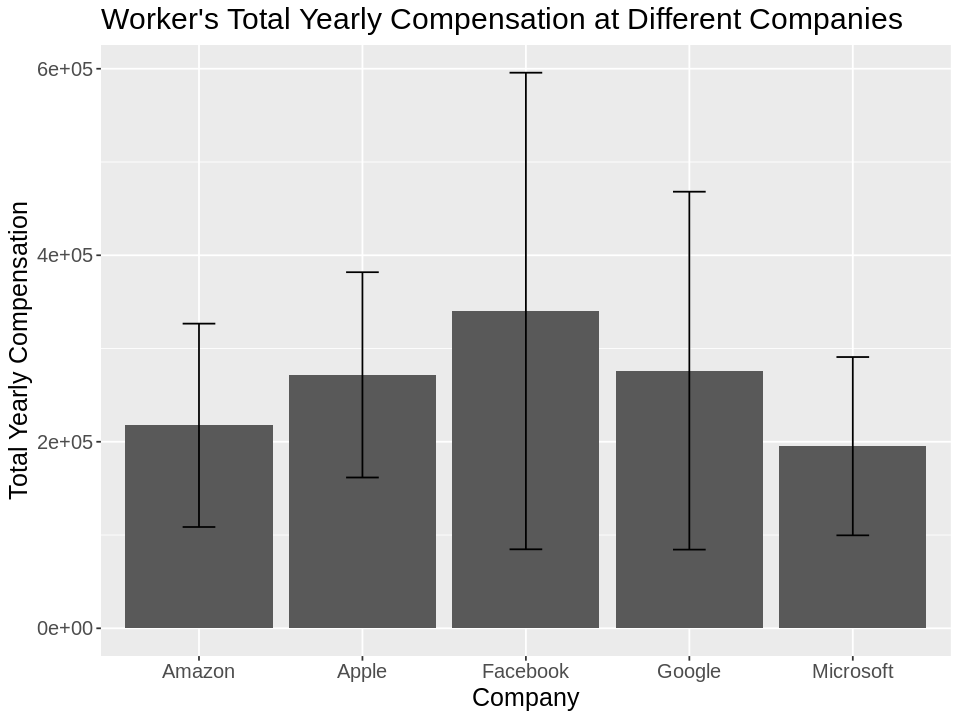

In [11]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_tyc <- data_train |> group_by(company) |>
                summarize(mean_tyc=mean(totalyearlycompensation), sd_tyc=sd(totalyearlycompensation))
#data_for_vis_tyc
tyc_vis_bar <-  data_for_vis_tyc |>
                ggplot(aes(x=company, y=mean_tyc)) +
                geom_bar(stat="identity") +
                geom_errorbar(aes(x=company, ymin=mean_tyc-sd_tyc,ymax=mean_tyc+sd_tyc, width=.2)) +
                labs(title="Worker's Total Yearly Compensation at Different Companies", x="Company", y="Total Yearly Compensation") +
                theme(text = element_text(size=15)) 
tyc_vis_bar

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


company,Female,Male
<chr>,<int>,<int>
Amazon,318,1605
Apple,87,364
Facebook,154,603
Google,179,794
Microsoft,235,978


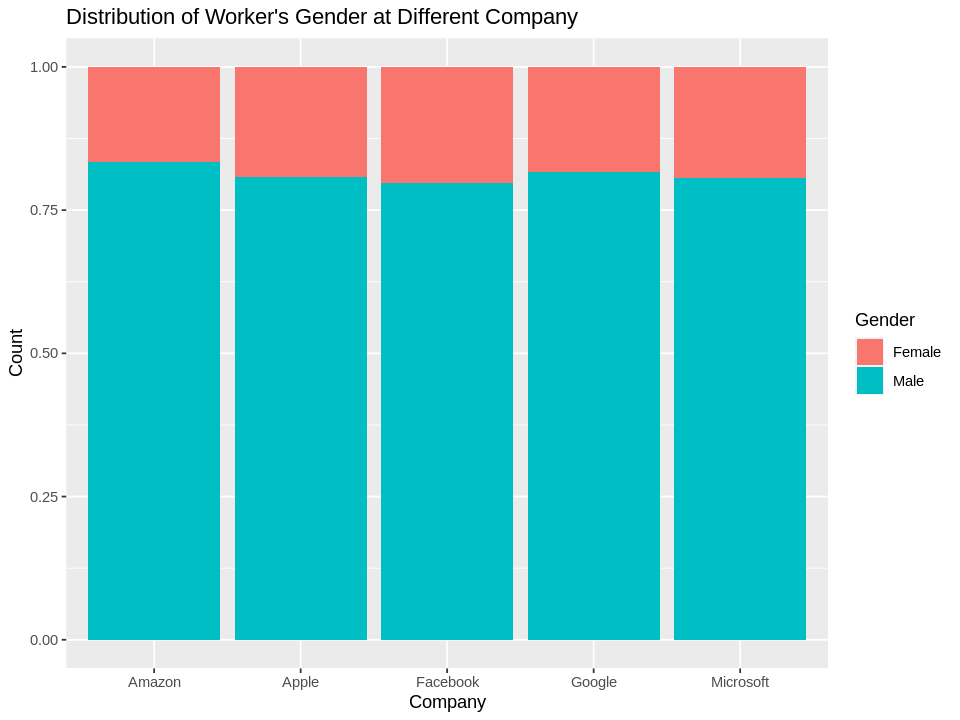

In [12]:
options(repr.plot.width = 8, repr.plot.height = 6)
data_for_vis_gen <- data_train |> group_by(company,gender) |>
                summarize(count=n())
#data_for_vis_gen
gen_vis_table <- data_for_vis_gen |> pivot_wider(names_from=gender,values_from=count)
gen_vis_table
gen_vis_bar <- ggplot(data_for_vis_gen, aes(x = company, y = count, fill = gender)) + 
                geom_bar(stat = "identity", position = "fill") + 
                labs(title="Distribution of Worker's Gender at Different Company",x="Company", y="Count", fill = "Gender")
gen_vis_bar

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


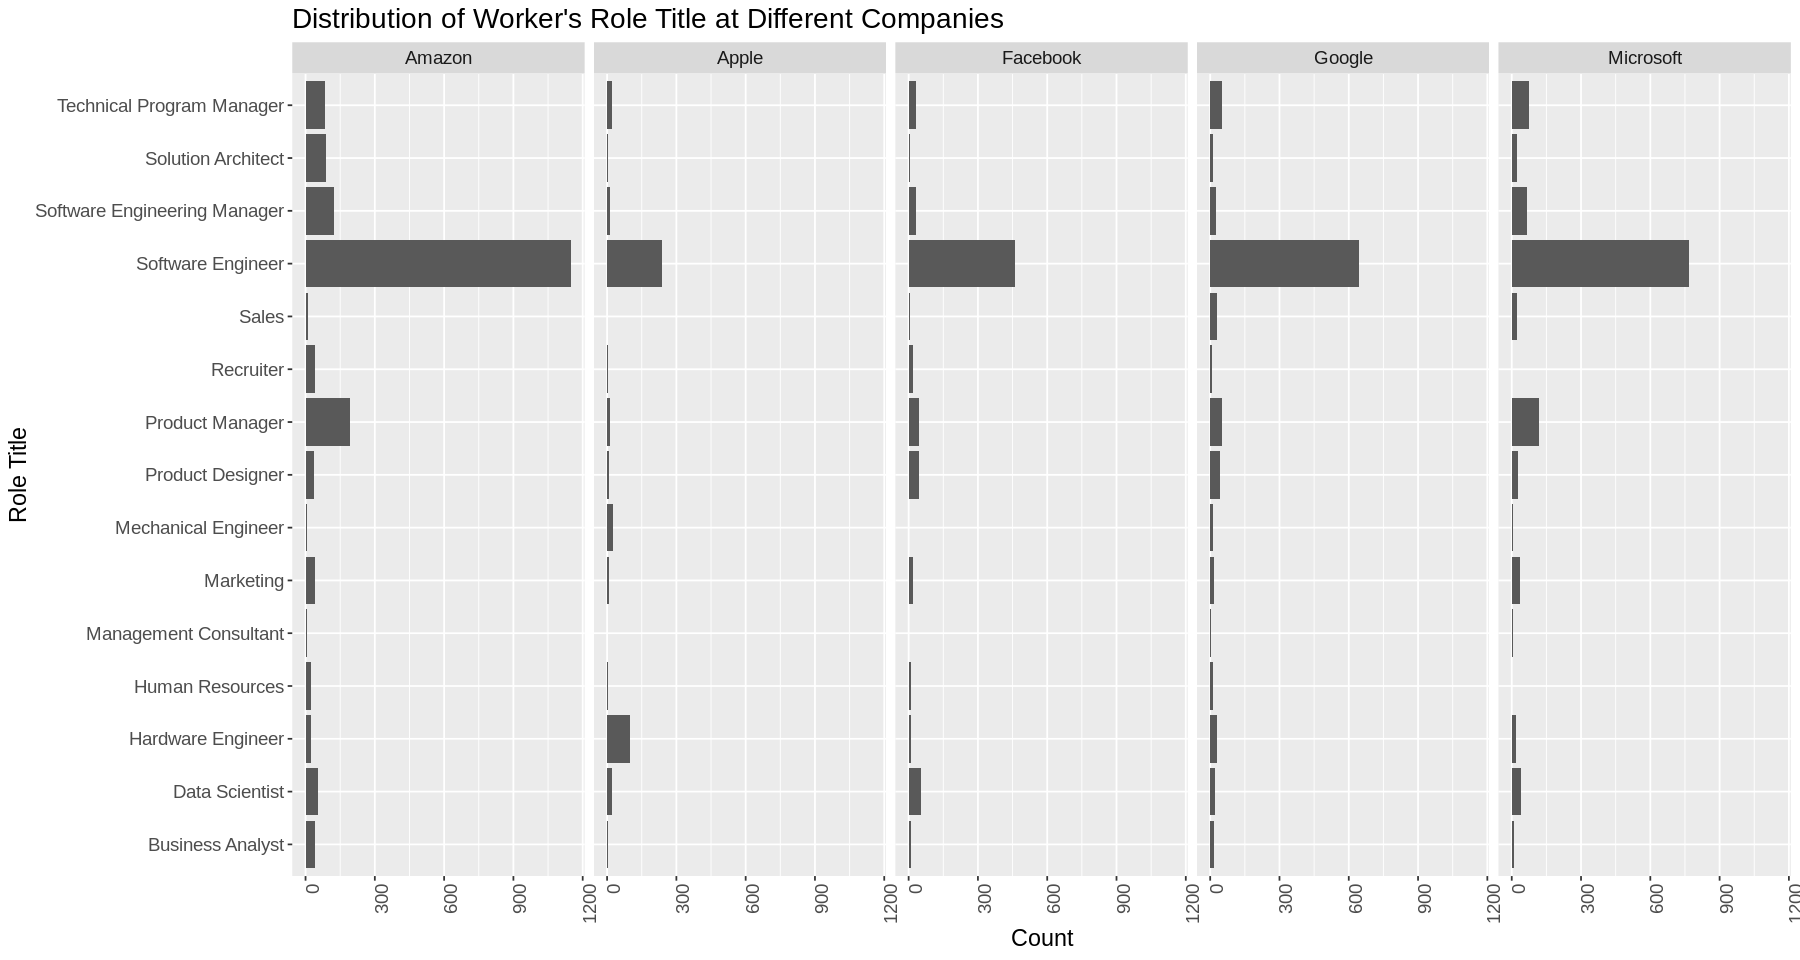

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_title <- data_train |> group_by(company, title) |> summarize(count=n())
title_vis_bar <- data_for_vis_title |>
    ggplot(aes(x = count, y = title)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Role Title", title = "Distribution of Worker's Role Title at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
title_vis_bar

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


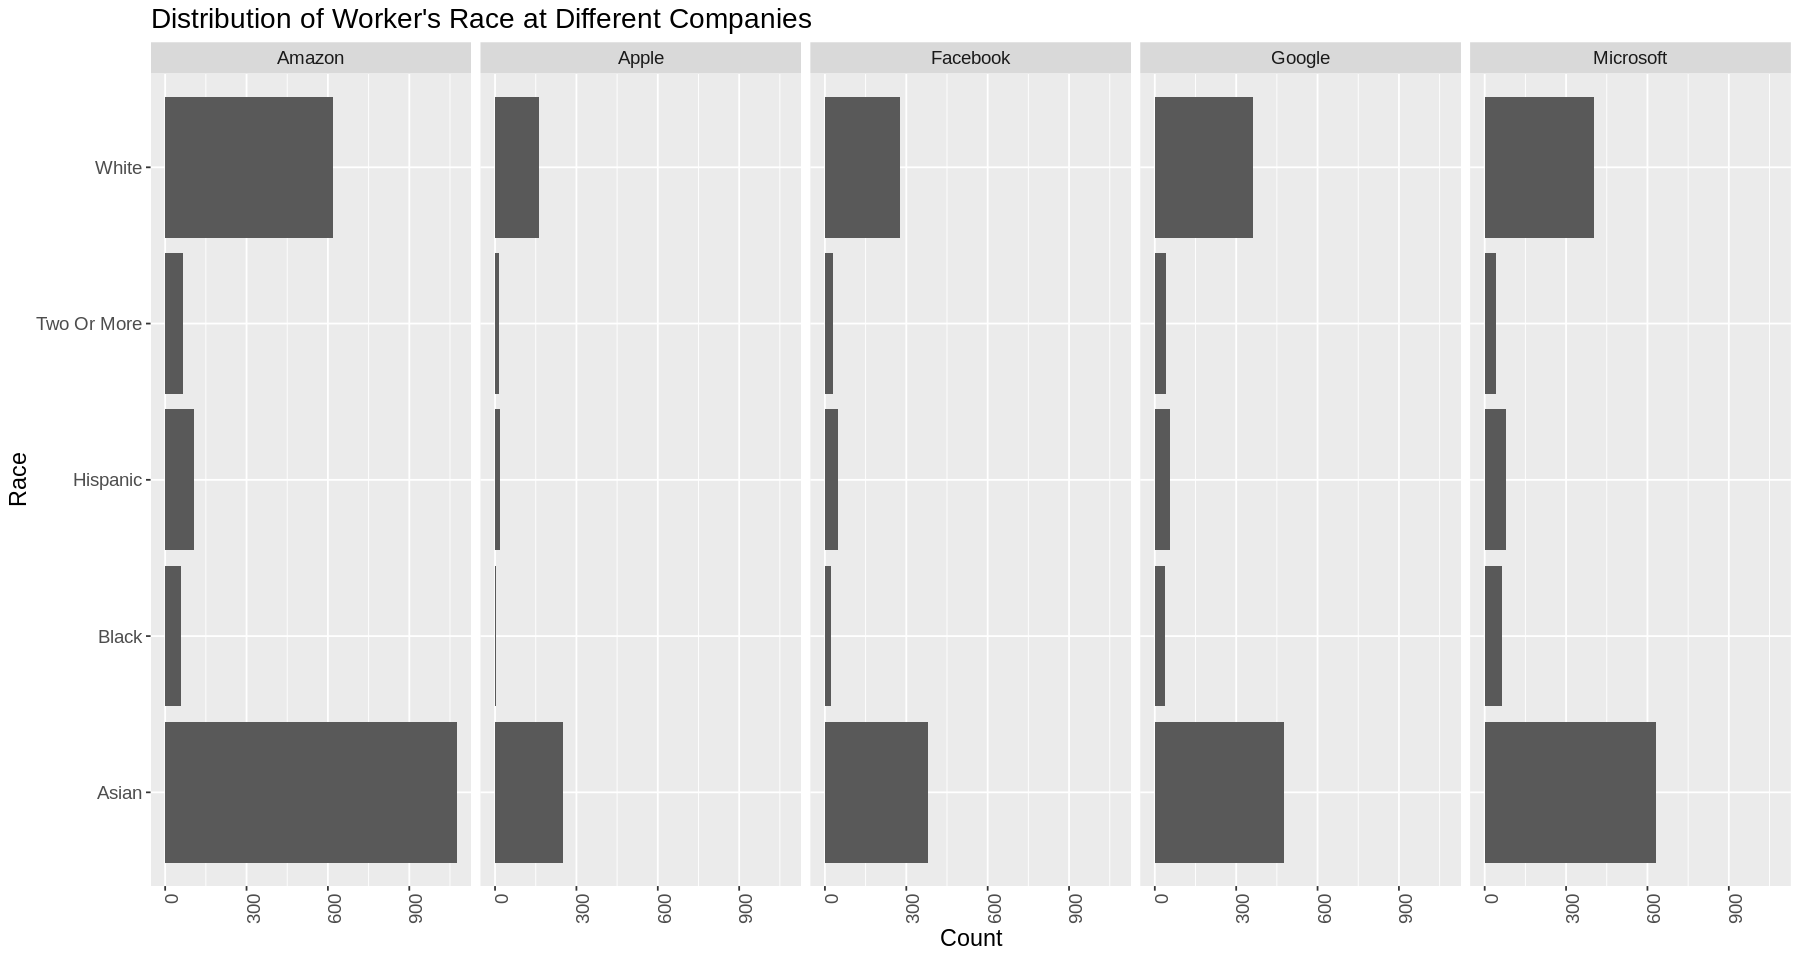

In [14]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_race <- data_train |> group_by(company, Race) |> summarize(count=n())
race_vis_bar <- data_for_vis_race |>
    ggplot(aes(x = count, y = Race)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Race", title = "Distribution of Worker's Race at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
race_vis_bar

`summarise()` has grouped output by 'company'. You can override using the
`.groups` argument.


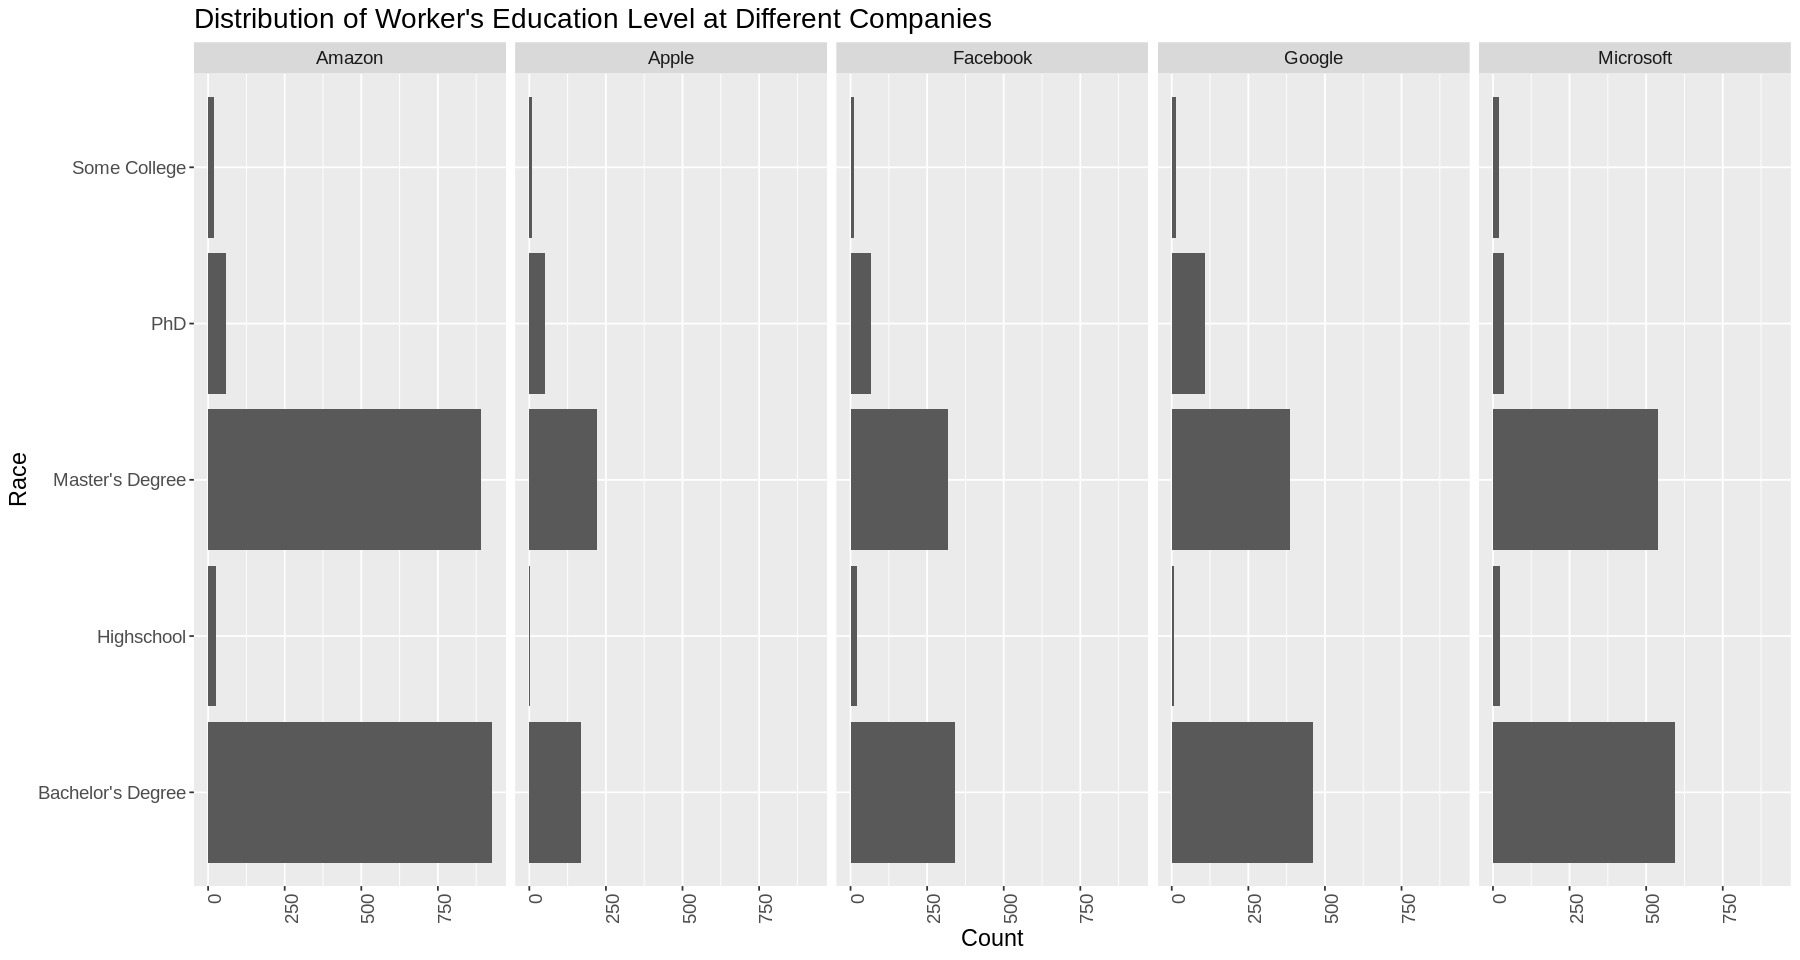

In [15]:
options(repr.plot.width = 15, repr.plot.height = 8)
data_for_vis_edu <- data_train |> group_by(company, Education) |> summarize(count=n())
edu_vis_bar <- data_for_vis_edu |>
    ggplot(aes(x = count, y = Education)) + 
        geom_bar(stat="identity") +
        labs(x = "Count", y = "Race", title = "Distribution of Worker's Education Level at Different Companies") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=14))
edu_vis_bar

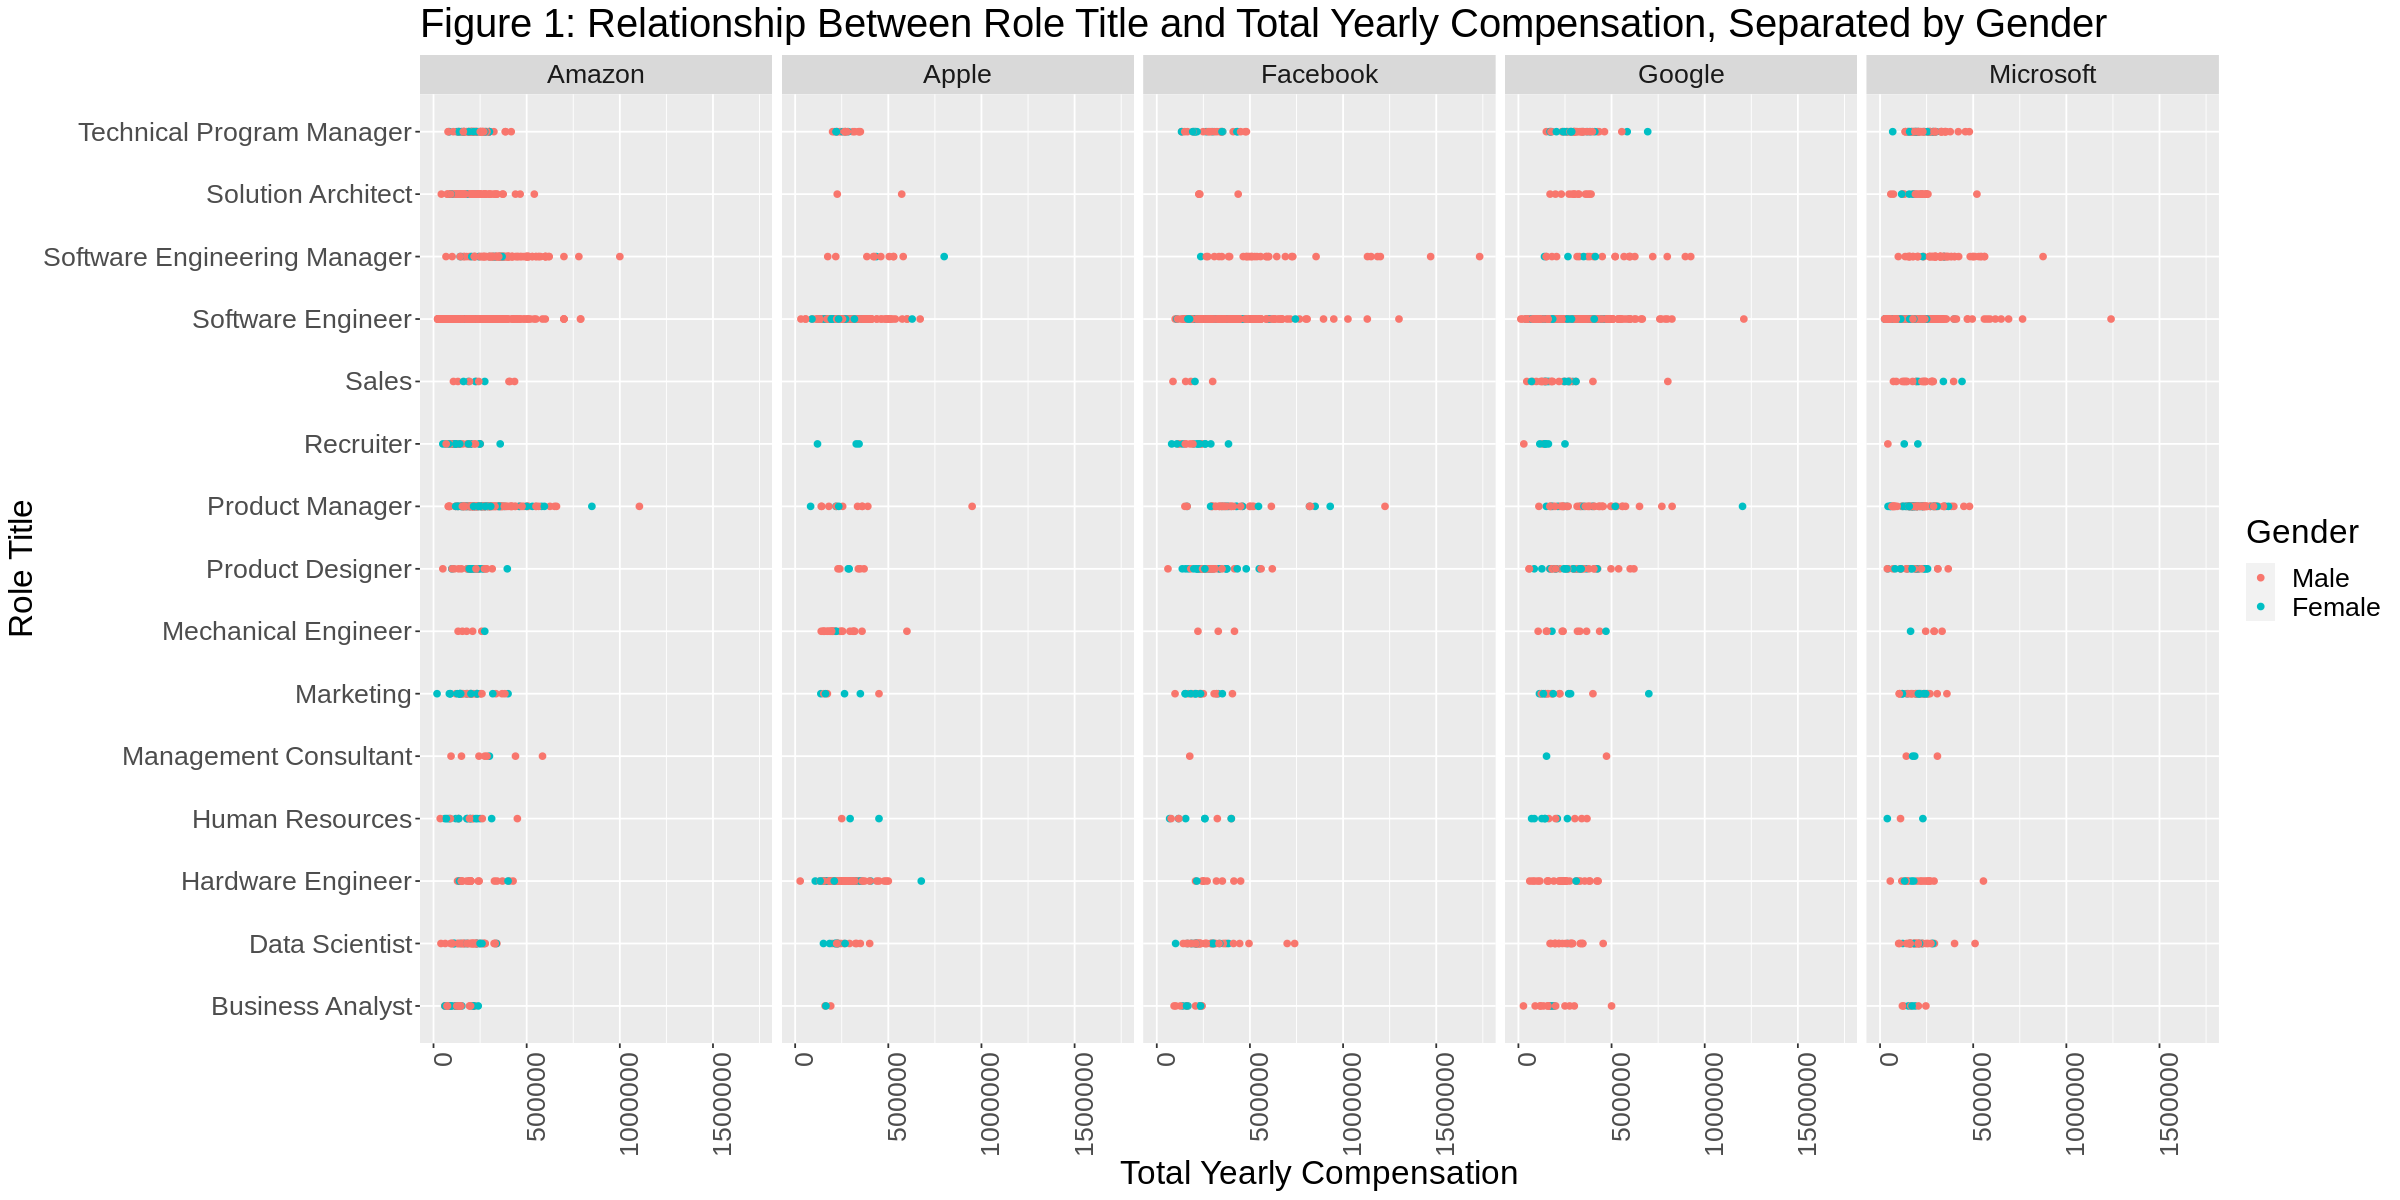

In [16]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
salary_gender <- data_train |>
    filter(totalyearlycompensation <= 2000000) |>
    ggplot(aes(x = totalyearlycompensation, y = title)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Total Yearly Compensation", y = "Role Title", colour = "Gender",  title = "Figure 1: Relationship Between Role Title and Total Yearly Compensation, Separated by Gender") + 
        facet_grid(cols = vars(company)) +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=20))
salary_gender

From the figure we can see that, 

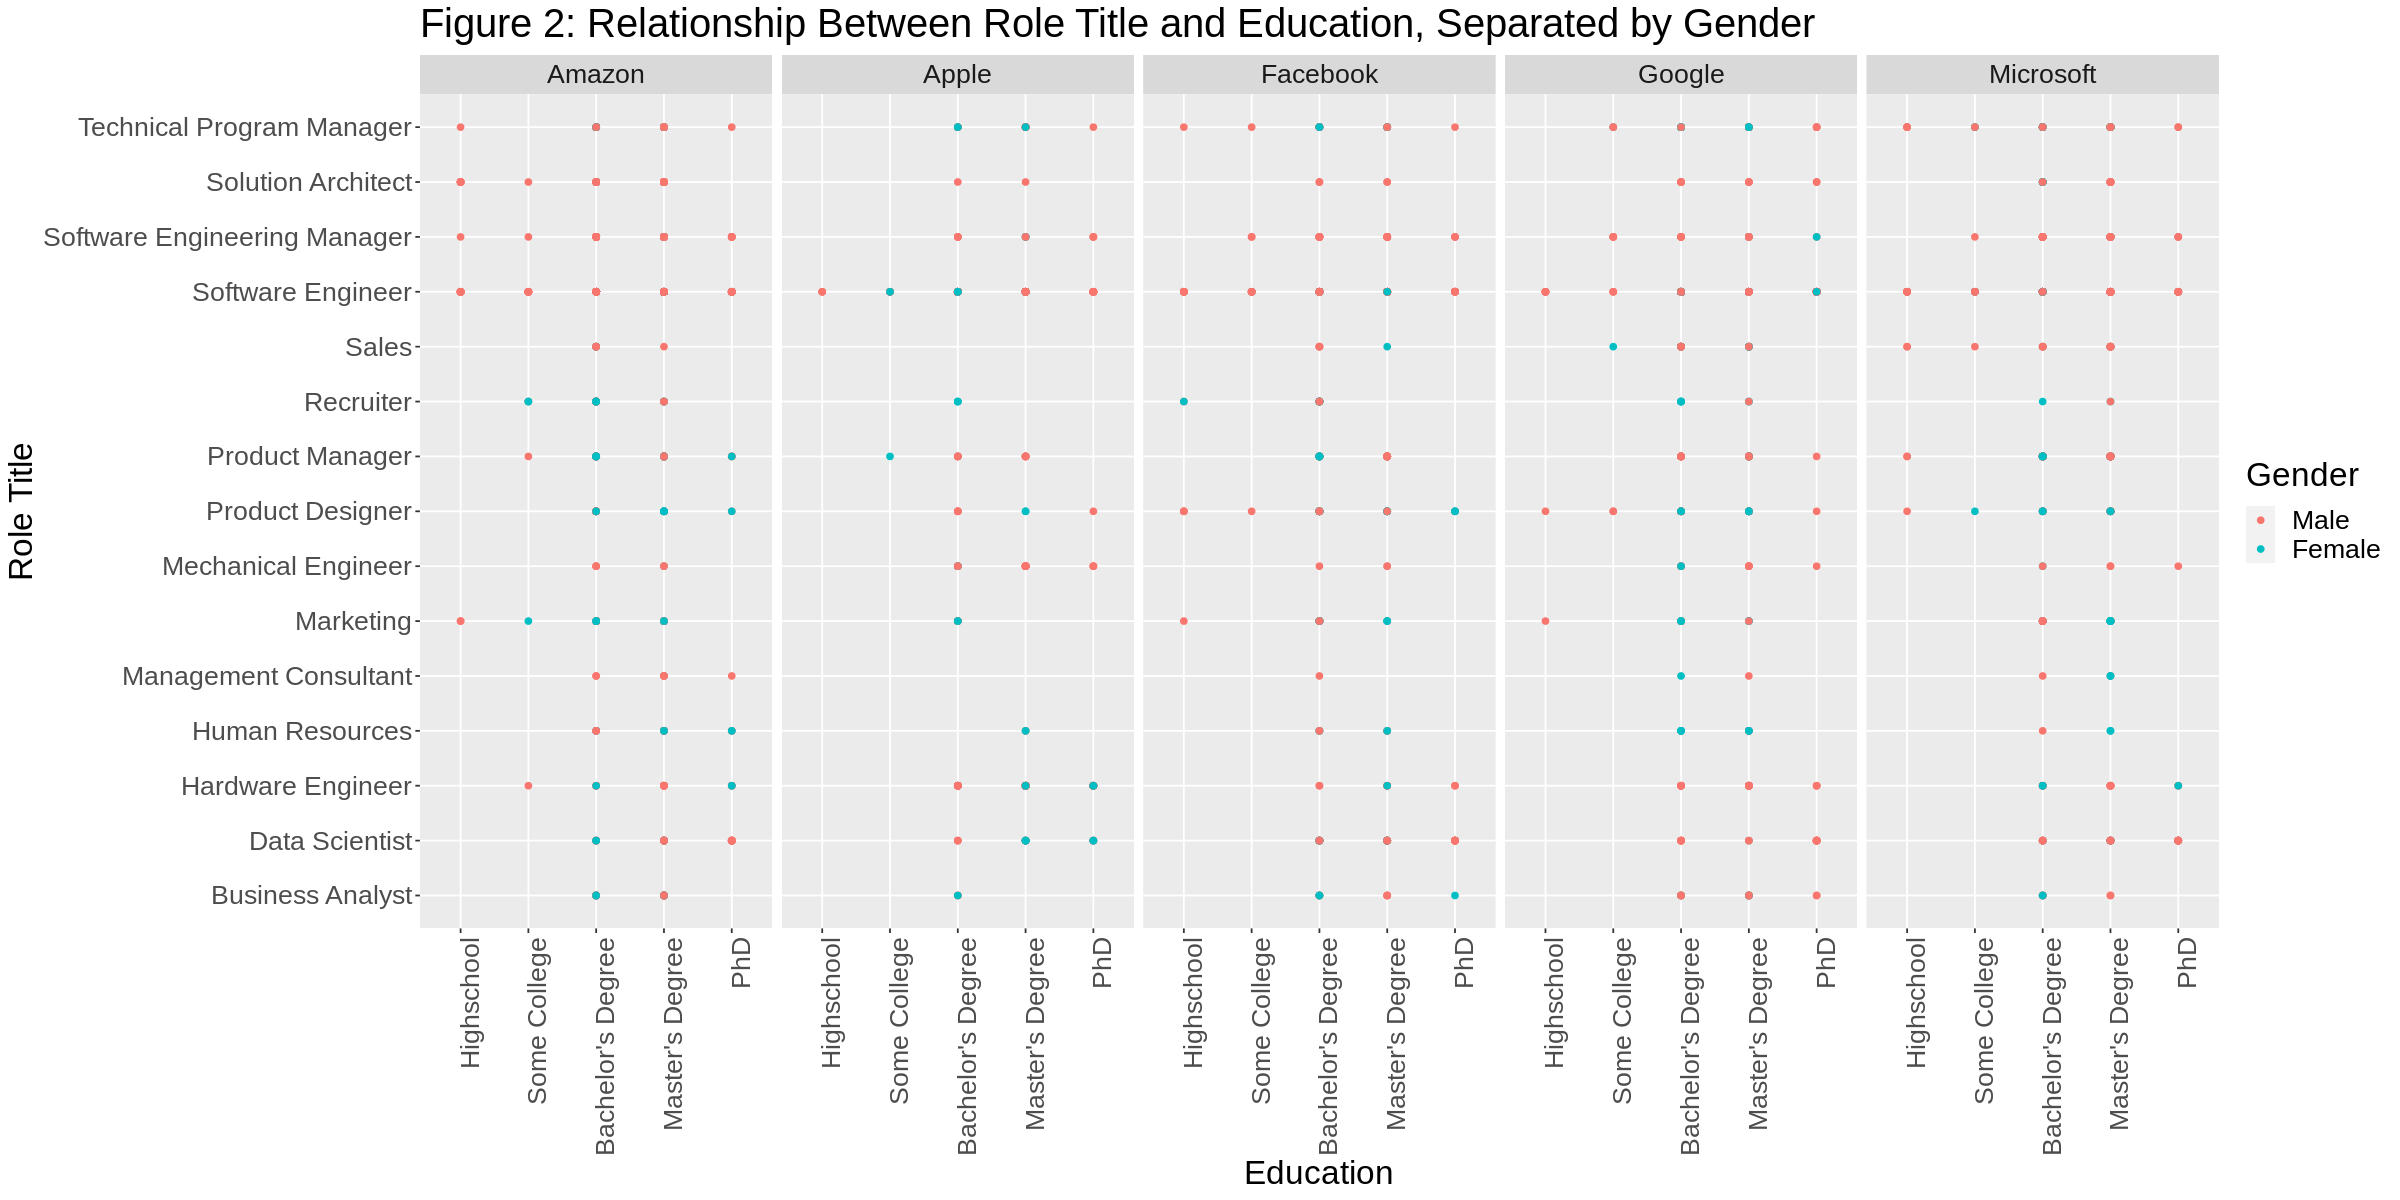

In [17]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
bonus_gender <- data_train |>
    mutate(Education = factor(Education, level = c("Highschool", "Some College", "Bachelor's Degree", "Master's Degree", "PhD"))) |>
    ggplot(aes(x = Education, y = title)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Education", y = "Role Title", colour = "Gender", title = "Figure 2: Relationship Between Role Title and Education, Separated by Gender") + 
        facet_grid(cols = vars(company))+
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=20))
bonus_gender

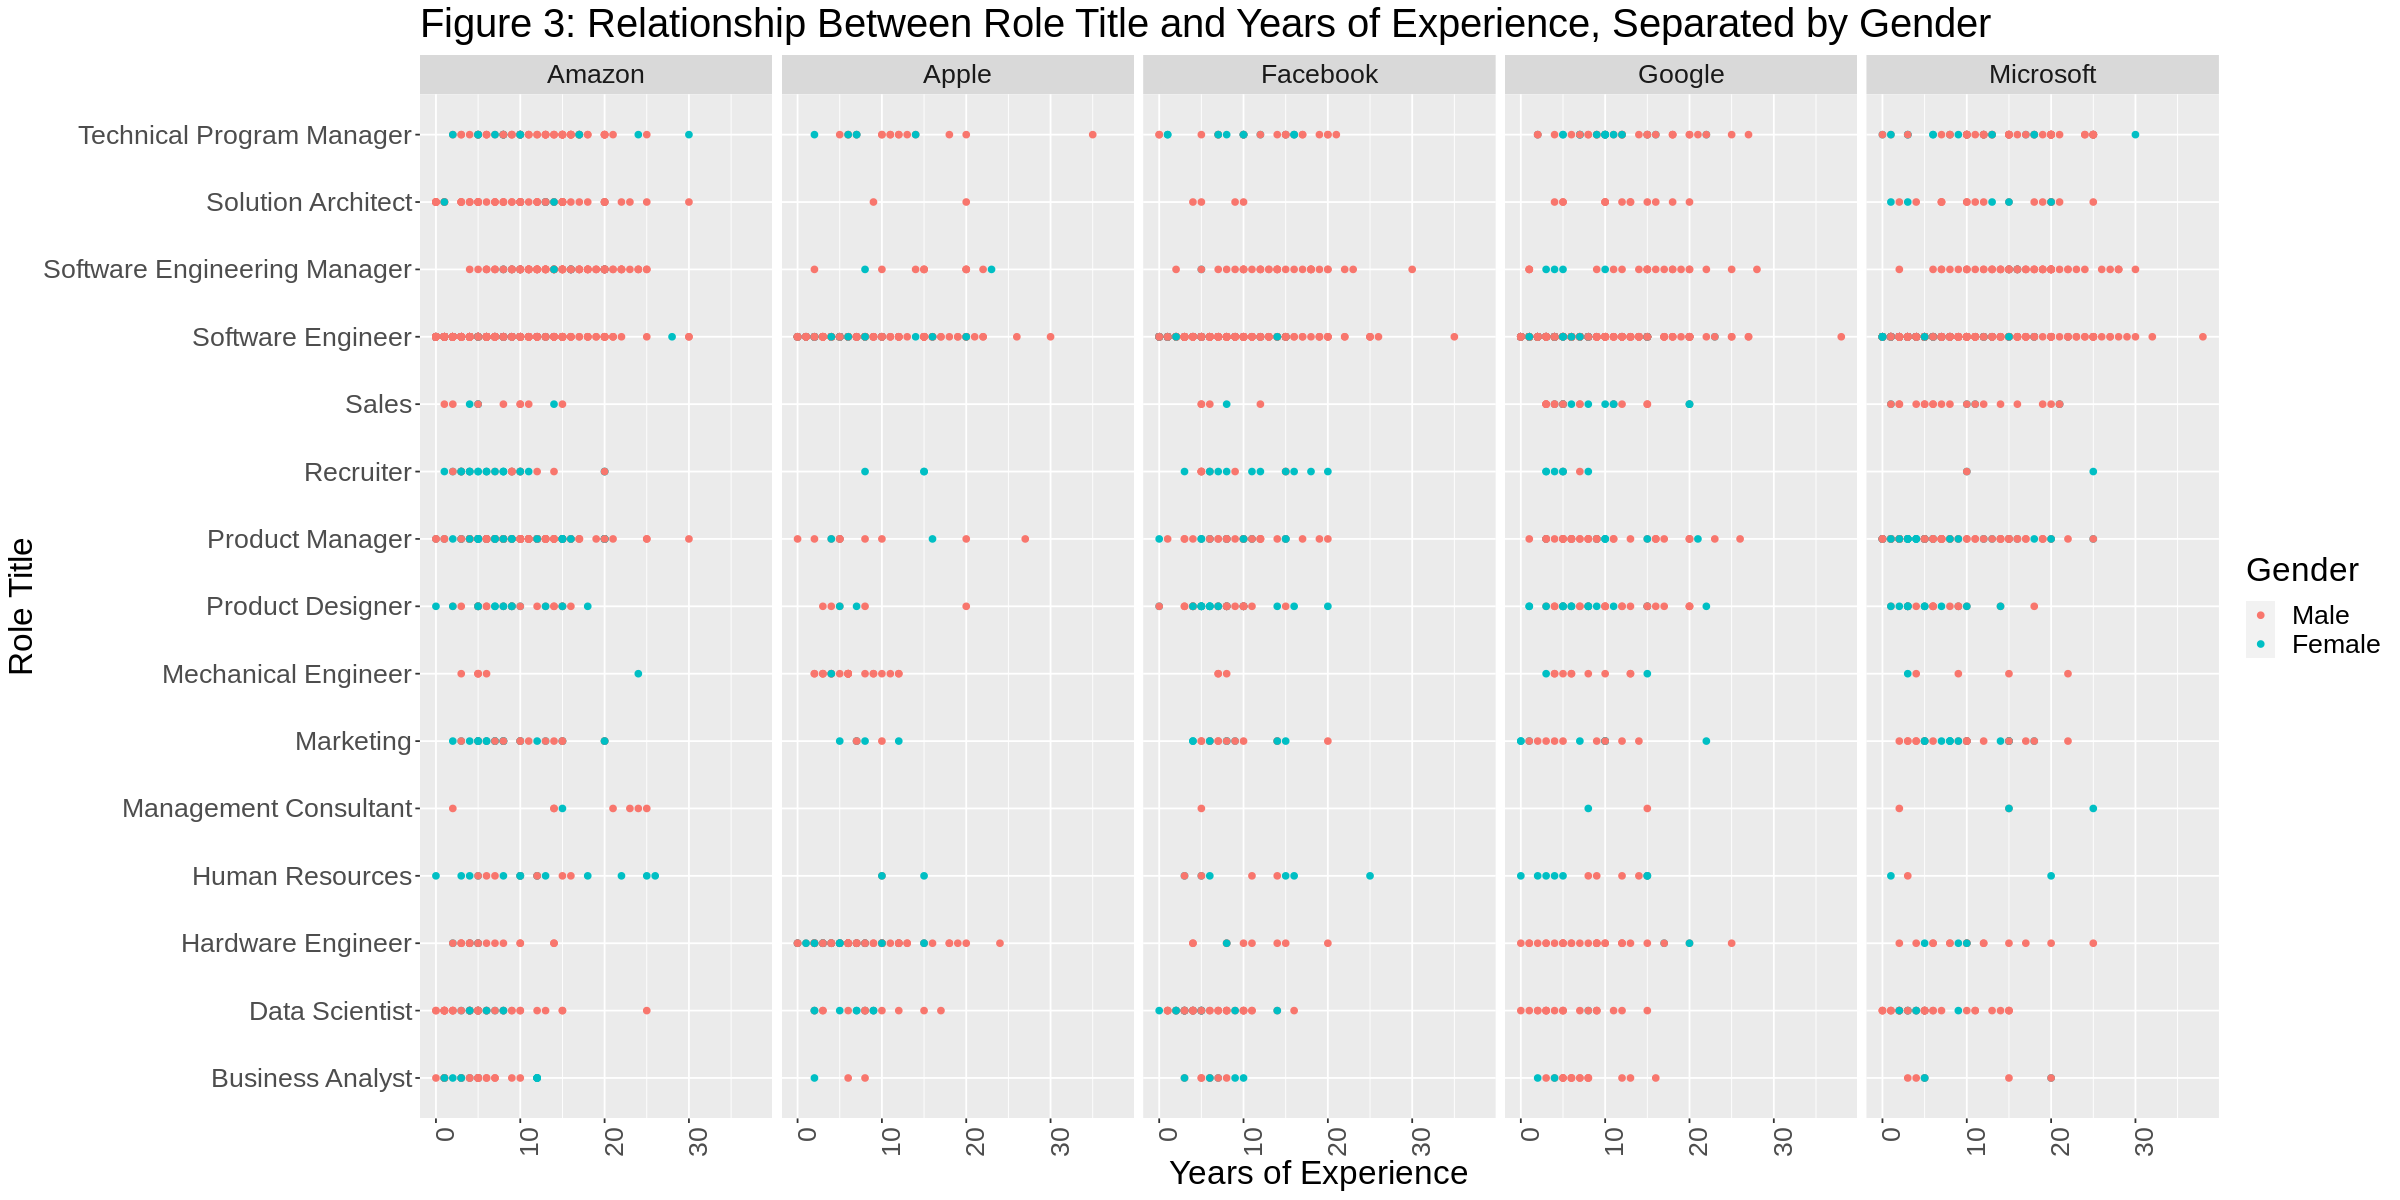

In [18]:
options(repr.plot.width = 20, repr.plot.height = 10)
options(scipen = 10)
bonus_gender <- data_train |>
    ggplot(aes(x = yearsofexperience, y = title)) + 
        geom_point(aes(colour = as_factor(gender))) +
        labs(x = "Years of Experience", y = "Role Title", colour = "Gender", title = "Figure 3: Relationship Between Role Title and Years of Experience, Separated by Gender") + 
        facet_grid(cols = vars(company))+
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        theme(text = element_text(size=20))
bonus_gender

#### Data Analysis
Before we start working on the classification process, we have to prepare our total dataset. Since we are going to use `company` as the class and the other columns as the predictors, there are a few things we need to do.


### Discussion

In this project, we expect to find the most relevant predictors that can affect the company you join because they can vary based on years of experience, gender, and expected salary. The result we found —— the combination of A and B has the highest accuracy rate for prediction is in line with our expectations at the beginning. The impact is impactful to the job market and the trajectory of the career path for the people who are currently searching for jobs and people who are interested in learning more about their career development. Those predictors can be something to consider when they are researching opportunities. However, as our dataset is not fully complete - some columns are hard-to-interpret and variables have a high percentage of N/A, it will be helpful to refresh the survey in the near future to get more information. This can provide us with a clear understanding and strengthen the correlation of the variables. Hence, future questions for us might be on how other factors (location, job title, and university they graduated from) can affect the company workers should choose to work.

### Reference

[1] Ogozaly, Jack. “Data Science and STEM Salaries.” Kaggle, 10 Oct. 2021, https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries. 